### Deep CNN on the CIFAR10 datasets (due: July 3)

In [1]:
import keras, os
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
batch_size = 32
num_classes = 10
epochs = 40
data_augumentation = True
num_predictions = 20

In [3]:
# (X, Y training data), (X, Y testing data)
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
# (train(test)_samples, ...)
print('(X, Y)_train_shape:', X_train.shape, '|', Y_train.shape)
print('(X, Y)_test_shape :', X_test.shape, '|', Y_test.shape)

(X, Y)_train_shape: (50000, 32, 32, 3) | (50000, 1)
(X, Y)_test_shape : (10000, 32, 32, 3) | (10000, 1)


In [5]:
# Convert class vectors to binary class matrixes
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [6]:
model = Sequential()

# inner layer (if "layers" is 0, then this is the input layer)
for layers in range(2):
    model.add(Conv2D(32, (3, 3), 
                     padding='same', 
                     input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

# output layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

W0701 16:28:06.418179 140546610620224 deprecation_wrapper.py:119] From /home/kensuke/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 16:28:06.429764 140546610620224 deprecation_wrapper.py:119] From /home/kensuke/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 16:28:06.432991 140546610620224 deprecation_wrapper.py:119] From /home/kensuke/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 16:28:06.451249 140546610620224 deprecation_wrapper.py:119] From /home/kensuke/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0701 16:28:06.

In [7]:
# initiate RMSprop optimizer
optimizer = keras.optimizers.rmsprop(lr=0.0001, decay=0.00001)

# train the model with RMSprop
model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

W0701 16:28:06.526158 140546610620224 deprecation_wrapper.py:119] From /home/kensuke/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0701 16:28:06.530004 140546610620224 deprecation_wrapper.py:119] From /home/kensuke/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
if not data_augumentation:
    print('=== Not using data_augmentation ===')
    model.fit(X_train, Y_train,
             batch_size=batch_size,
             epochs=epochs,
             validation_data=(X_test, Y_test),
             shuffle=True)
else:
    print('=== Real-time data_augmentation ===')
    data_genarator = ImageDataGenerator(featurewise_center=False,
                                       samplewise_center=False,
                                       featurewise_std_normalization=False,
                                       samplewise_std_normalization=False,
                                       zca_epsilon=0.00001,
                                       zca_whitening=False,
                                       rotation_range=0,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1,
                                       shear_range=0.,
                                       zoom_range=0.,
                                       channel_shift_range=0.,
                                       fill_mode='nearest',
                                       cval=0.,
                                       horizontal_flip=True,
                                       vertical_flip=False,
                                       rescale=None,
                                       preprocessing_function=None,
                                       data_format=None,
                                       validation_split=0.0)
    
    data_genarator.fit(X_train)
    generator = data_genarator.flow(X_train, Y_train,
                                    batch_size = batch_size)
    model.fit_generator(generator,
                        steps_per_epoch=len(generator),
                        epochs=epochs,
                        validation_data=(X_test, Y_test),
                        workers=4)

=== Real-time data_augmentation ===


W0701 16:28:07.014009 140546610620224 deprecation.py:323] From /home/kensuke/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/40
1563/1563 [==============================] - 37s 24ms/step - loss: 1.9374 - acc: 0.2866 - val_loss: 1.6421 - val_acc: 0.4176
Epoch 2/40
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6676 - acc: 0.3892 - val_loss: 1.5861 - val_acc: 0.4317
Epoch 3/40
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5649 - acc: 0.4259 - val_loss: 1.3870 - val_acc: 0.4971
Epoch 4/40
1563/1563 [==============================] - 35s 23ms/step - loss: 1.4900 - acc: 0.4580 - val_loss: 1.3308 - val_acc: 0.5178
Epoch 5/40
1563/1563 [==============================] - 35s 23ms/step - loss: 1.4348 - acc: 0.4821 - val_loss: 1.2754 - val_acc: 0.5431
Epoch 6/40
1563/1563 [==============================] - 35s 23ms/step - loss: 1.3847 - acc: 0.5017 - val_loss: 1.3781 - val_acc: 0.4958
Epoch 7/40
1563/1563 [==============================] - 35s 23ms/step - loss: 1.3418 - acc: 0.5180 - val_loss: 1.1942 - val_acc: 0.5687
Epoch 8/40
1563/1563 [==========================

In [10]:
"""
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at \"%s\".' % model_path)
"""

'\nif not os.path.isdir(save_dir):\n    os.makedirs(save_dir)\nmodel_path = os.path.join(save_dir, model_name)\nmodel.save(model_path)\nprint(\'Saved trained model at "%s".\' % model_path)\n'

In [11]:
# Score trained model.
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 5s 484us/step
Test loss: 0.837416032409668
Test accuracy: 0.7096


In [12]:
print(model.history.history['val_acc'])

[0.4176, 0.4317, 0.4971, 0.5178, 0.5431, 0.4958, 0.5687, 0.572, 0.5997, 0.5993, 0.6145, 0.6201, 0.6263, 0.6442, 0.652, 0.6425, 0.6512, 0.6652, 0.6597, 0.6594, 0.6659, 0.6776, 0.6654, 0.6929, 0.6935, 0.6939, 0.6771, 0.6763, 0.6849, 0.6818, 0.6715, 0.7148, 0.7004, 0.6901, 0.7007, 0.6976, 0.7068, 0.712, 0.7141, 0.7096]


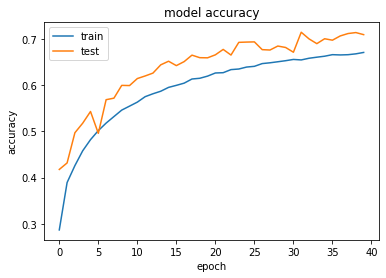

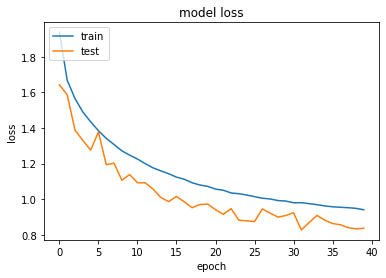

In [15]:
import matplotlib.pyplot as plt

# plotting accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plotting occurred loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()